In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = './img/umamusu.jpg'
img = cv2.imread(img_path)
img_origen = img.copy()

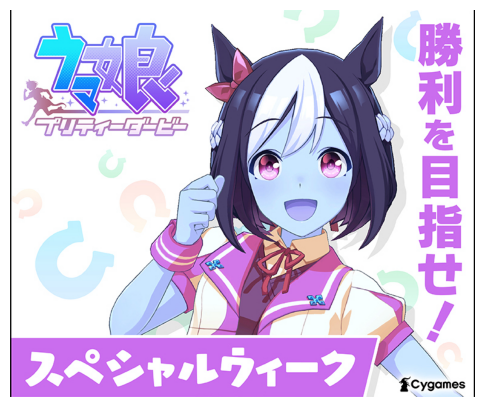

In [10]:
def display_image(image, show_axis=False, is_grayscale=False, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    if is_grayscale:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    if not show_axis:
        plt.axis('off')
    plt.show()
    
display_image(img)

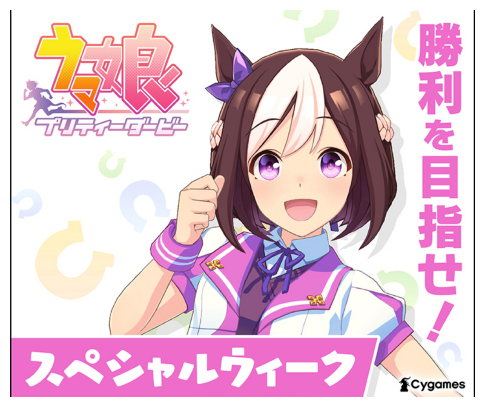

In [4]:
# RGBをBGRの順に入れ替える
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def BGR2RGB(_img):
    b = _img[:, :, 0].copy()
    g = _img[:, :, 1].copy()
    r = _img[:, :, 2].copy()

    # RGB > BGR
    _img[:, :, 0] = r
    _img[:, :, 1] = g
    _img[:, :, 2] = b

    return _img

img = BGR2RGB(img)
display_image(img)

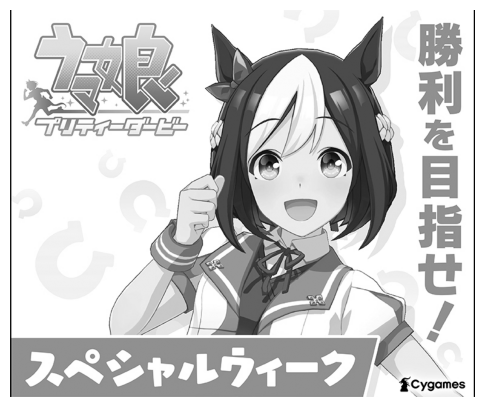

In [12]:
# グレースケールに変換、式は Y=0.2126(R)+0.7152(G)+0.0722(B)
# img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
def BGR2GRAY(_img):
	b = _img[:, :, 0].copy()
	g = _img[:, :, 1].copy()
	r = _img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

img_gray = BGR2GRAY(img)
display_image(img_gray, is_grayscale=True)

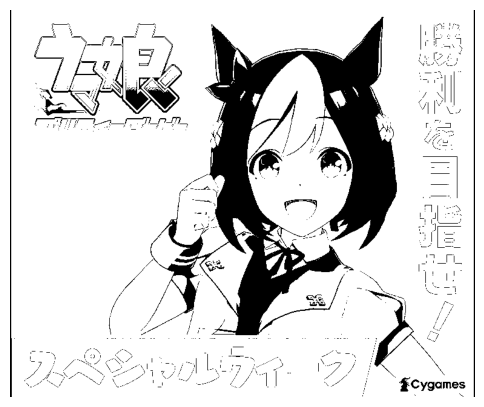

In [15]:
# 2値化

def binarization(_img, th=128):
	_img[_img < th] = 0
	_img[_img >= th] = 255
	return _img

img_bin = binarization(img_gray)
display_image(img_bin, is_grayscale=True)

In [ ]:
# max pooling
def max_pooling(_img, K_size=8):
    H, W = _img.shape
    out = np.zeros((H // K_size, W // K_size), dtype=np.float)

    for y in range(0, H, K_size):
        for x in range(0, W, K_size):
            out[y // K_size, x // K_size] = np.max(_img[y:y + K_size, x:x + K_size])

    return out


In [ ]:
# average pooling